STEP 1 : Extract the ZIP file. The dataset from Kaggle is provided in a ZIP archive.  
We need to extract it first so we can access the `weatherHistory.csv` file inside.

In [1]:
import zipfile
import os

# lokasi file zip
zip_path = "../data/archive.zip"
extract_path = "../data/"

# extract file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Berhasil di-extract ke folder:", extract_path)
print("Isi folder data:", os.listdir(extract_path))

✅ Berhasil di-extract ke folder: ../data/
Isi folder data: ['archive.zip', 'weatherHistory.csv']


STEP 2 : Check folders & files.
Make sure the data file is available before we start analysis.

In [4]:
import os

# check current working directory
print("Current working directory:", os.getcwd())

# check contents of the parent folder (should contain 'data' and 'notebooks')
print("\nParent folder contents:", os.listdir(".."))

# check contents of the data folder
print("\nData folder contents:", os.listdir("../data"))

Current working directory: C:\Users\Admin\Downloads\weather_data\notebooks

Parent folder contents: ['data', 'notebooks', 'README.MD']

Data folder contents: ['archive.zip', 'weatherHistory.csv']


STEP 3 : Import library. We will use:
- **pandas** for data manipulation,  
- **matplotlib** and **seaborn** for data visualization.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style for better looking plots
sns.set(style="whitegrid")

STEP 4 : Load dataset. We will load the weather dataset (`weatherHistory.csv`) from the `data` folder into a pandas DataFrame.

In [6]:
# Load dataset
df = pd.read_csv("../data/weatherHistory.csv")

# Show first 5 rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


STEP 5 : Initial exploration. Before diving deeper, let’s explore the dataset to understand its structure.
We will check the dataset’s shape, column names, data types, summary statistics, and missing values.

In [10]:
# Dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Column names
print("\nColumn names:\n", df.columns.tolist())

# Dataset info (data types, non-null counts)
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (96453, 12)

Column names:
 ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9 

STEP 6 : Data Visualization: Temperature & Humidity. We will plot the distribution of Temperature (°C) and Humidity to get an overview of their ranges and trends.

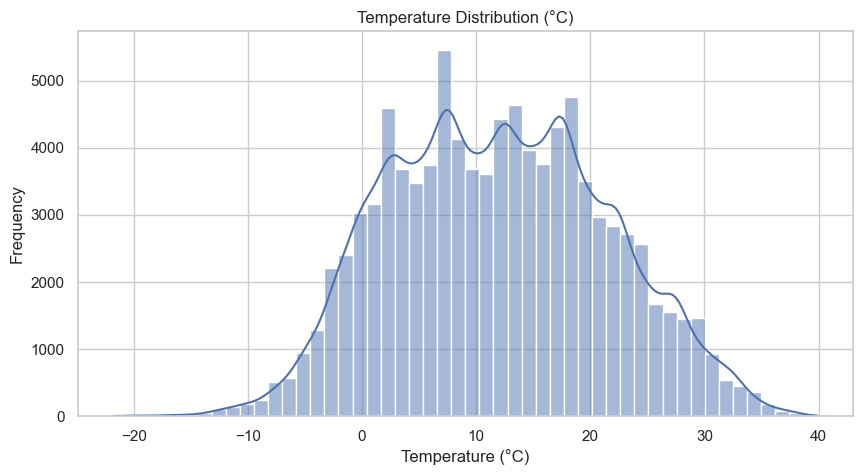

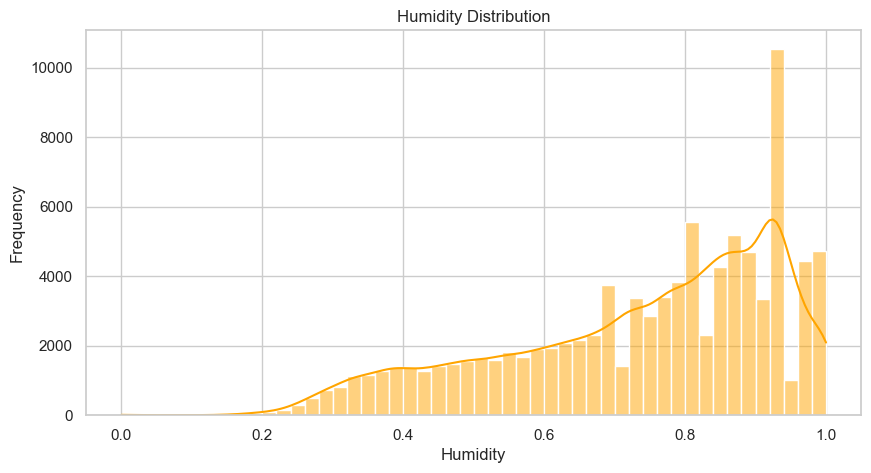

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temperature distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Temperature (C)'], bins=50, kde=True)
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# Humidity distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Humidity'], bins=50, kde=True, color="orange")
plt.title("Humidity Distribution")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

STEP 7 : Data cleaning. We will handle missing values and remove duplicates to ensure the dataset is clean.

In [12]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values in 'Precip Type'
df = df.dropna(subset=['Precip Type'])

# Check again after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

Missing values per column:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Missing values after cleaning:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

Number of duplicate rows: 24


STEP 8 : Statistical summary. We will calculate basic statistics such as average, minimum, and maximum values.

In [13]:
# Average temperature
print("Average Temperature:", round(df['Temperature (C)'].mean(), 2), "°C")

# Average humidity
print("Average Humidity:", round(df['Humidity'].mean(), 2))

# Minimum and maximum temperature
print("Minimum Temperature:", round(df['Temperature (C)'].min(), 2), "°C")
print("Maximum Temperature:", round(df['Temperature (C)'].max(), 2), "°C")

Average Temperature: 11.94 °C
Average Humidity: 0.73
Minimum Temperature: -21.82 °C
Maximum Temperature: 39.91 °C


STEP 9 : Categorical Analysis (Precipitation Type). See the distribution of rain vs snow

In [27]:
print("\nDistribusi Precip Type:")
print(df['Precip Type'].value_counts())


Distribusi Precip Type:
Precip Type
rain    85200
snow    10712
Name: count, dtype: int64


STEP 10 : Visualisasi pie chart. Percentage rain vs snow 

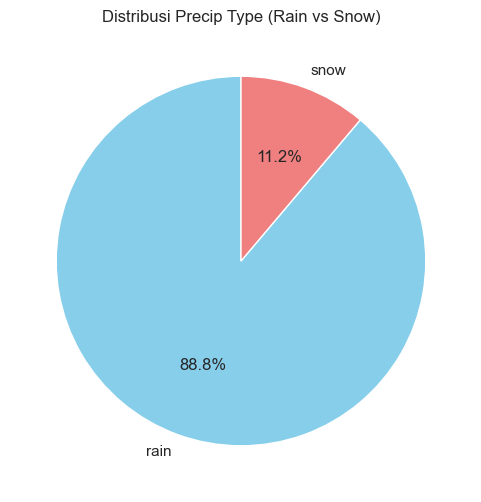

In [28]:
plt.figure(figsize=(6,6))
df['Precip Type'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightcoral']
)
plt.title("Distribusi Precip Type (Rain vs Snow)")
plt.ylabel("")
plt.show()

### Insight: Precipitation Type Distribution

- The majority of weather events are dominated by **Rain**, with a percentage of around 88%.
- The remainder is **Snow**, with a percentage of around 12%.
- This means that rain is much more common than snow in this dataset.